# Dataset Preprocessing and Loading

This notebook demonstrates how to extract the default dataset given using functions in `dataset.py`, `template.py` and `descriptor.py`

In [20]:
from descriptor import *
from dataset import *
from template import *
from matplotlib import pyplot as plt
import os
import cv2
import pickle

## Extract Annotations

Annotations include metadata on the dataset, such as the bounding boxes of ground truths, pose and classification status

In [5]:
curr_wd = os.getcwd()
annot_source_path = os.path.join(curr_wd, 'cache_anno')
annot_source_path_train = os.path.join(annot_source_path, 'train_annots.pkl')
annot_source_path_val = os.path.join(annot_source_path, 'val_annots.pkl')

# Extract Annotations if file does not exist
# NOTE: Delete existing .pkl files before running is recommended
if not os.path.exists(annot_source_path_train):
    extract_annots(validation=False)
if not os.path.exists(annot_source_path_val):
    extract_annots(validation=True)

In [6]:
# Load annotations
with open(annot_source_path_train, 'rb') as f:
    train_annots = pickle.load(f)

with open(annot_source_path_val, 'rb') as f:
    val_annots = pickle.load(f)
    
val_annots # Display format

{'003': {'wenda': [912, 804, 932, 836], 'waldo': [292, 427, 311, 475]},
 '018': {'waldo': [2479, 3945, 2802, 4630],
  'wenda': [7029, 4378, 7216, 4648],
  'wizard': [1372, 3953, 1787, 4607]},
 '036': {'waldo': [614, 488, 874, 748]},
 '043': {'waldo': [3779, 6068, 4010, 6753]},
 '038': {'waldo': [2425, 88, 2879, 596],
  'wizard': [318, 5073, 772, 5473],
  'wenda': [5518, 2519, 5648, 2888]},
 '056': {'wenda': [1453, 586, 1479, 635], 'waldo': [431, 83, 489, 159]},
 '067': {'wizard': [6810, 2991, 7048, 3399],
  'wenda': [3356, 5684, 3502, 6091],
  'waldo': [1564, 461, 1979, 1007]},
 '074': {'wenda': [1760, 4874, 1903, 5152], 'waldo': [902, 484, 1395, 1007]}}

## Extract Window Patches

We extract each bounding box of Waldo as a window, for which we can extract features from using interest point descriptors

In [5]:
# Extract windows for both train and validation
patch_source_path = os.path.join(curr_wd, 'datasets')
patch_source_path_train = os.path.join(patch_source_path, 'train')
patch_source_path_val = os.path.join(patch_source_path, 'val')

if not os.path.exists(patch_source_path_train):
    save_provided_patches(validation=False)
if not os.path.exists(patch_source_path_val):
    save_provided_patches(validation=True)

In [6]:
# Save extra patches and poses
pose_source_path = os.path.join(curr_wd, 'datasets', 'waldo_extra')

if not os.path.exists(pose_source_path):
    save_poses()

In [7]:
extra_poses_positive_path = os.path.join(curr_wd, 'datasets', 'extra', 'positives')
extra_poses_confusion_path = os.path.join(curr_wd, 'datasets', 'extra', 'confusion')

if not os.path.exists(extra_poses_confusion_path) or not os.path.exists(extra_poses_positive_path):
    save_extra_patches()

## Loading Dataset

In [9]:
# Load dataset file paths
train_src, val_src, extra_src = positive_source('waldo')
train_src[:5]

['/Users/lookaz/Documents/Y3S1/CS4243/Project/CS4243-Project/datasets/train/positives/waldo/gt_113.npy',
 '/Users/lookaz/Documents/Y3S1/CS4243/Project/CS4243-Project/datasets/train/positives/waldo/gt_107.npy',
 '/Users/lookaz/Documents/Y3S1/CS4243/Project/CS4243-Project/datasets/train/positives/waldo/gt_106.npy',
 '/Users/lookaz/Documents/Y3S1/CS4243/Project/CS4243-Project/datasets/train/positives/waldo/gt_8.npy',
 '/Users/lookaz/Documents/Y3S1/CS4243/Project/CS4243-Project/datasets/train/positives/waldo/gt_104.npy']

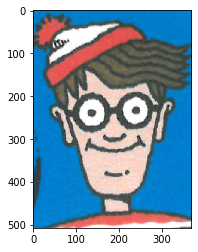

In [23]:
training_example = np.load(train_src[0])
training_example = cv2.cvtColor(training_example, cv2.COLOR_BGR2RGB)
plt.imshow(training_example)

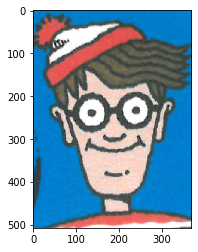

In [39]:
# Load the images from the list of file paths
train_set_positive = positive_loader(train_src)
train_set_positive = list(train_set_positive)
train_set_positive = [(cv2.cvtColor(x , cv2.COLOR_BGR2RGB)) for x in train_set_positive]
plt.imshow(train_set_positive[0])

### Python Module

On first loading the project directory, please run the below function to preprocess and load the necessary data. If a fresh preprocessing is required, set the `clean` parameter to `True`. If the below code block has issues, run the above code blocks in sequence.

In [ ]:
prepare_dataset(clean=False)
# NOTE: If cache anno has a default file, either remove it then run this function, or set clean to be true